<a href="https://colab.research.google.com/github/mianshariq/Mini_Projects/blob/master/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [37]:
df=pd.read_csv("https://github.com/mianshariq/Mini_Projects/raw/master/Unemployment_Insurance_Initial_Claims_By_Region_By_Month__Beginning_2003.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Period Ending   2100 non-null   object
 1   Region          2100 non-null   object
 2   Initial Claims  2100 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 49.3+ KB


In [41]:
#df['Period Ending']=df['Period Ending'].apply(lambda time: time.year)
df['Period Ending']=pd.to_datetime(df['Period Ending'])
df

,Period Ending,Region,Initial Claims
0,2003-07-31,Capital,4326
1,2003-07-31,Central New York,4366
2,2003-07-31,Finger Lakes,7095
3,2003-07-31,Hudson Valley,8454
4,2003-07-31,Long Island,13575
...,...,...,...
2095,2020-12-31,Mohawk Valley,5489
2096,2020-12-31,New York City,84695
2097,2020-12-31,North Country,4286
2098,2020-12-31,Southern Tier,5956


In [42]:
df_dpc1=df[['county', 'deaths']]
df_dpc=df_dpc1.groupby(by=df_dpc1['county']).max()
print(df_dpc1)
df_dpc=df_dpc.sort_values("deaths", ascending=False)

KeyError: ignored

In [43]:
df1=df.sort_values(by=["Region", "Period Ending"], ascending=True)

In [51]:
shifted = df1['Initial Claims'].shift(1)
df1['Initial Claims_Lag'] = ((df1['Initial Claims'] - shifted) / shifted)*100
df1['Initial Claims_Lag'] =df1["Initial Claims_Lag"].dropna()
df1['Initial Claims_Lag'] =df1["Initial Claims_Lag"].replace([np.inf, -np.inf], np.nan)


In [52]:
df

,Period Ending,Region,Initial Claims
0,2003-07-31,Capital,4326
1,2003-07-31,Central New York,4366
2,2003-07-31,Finger Lakes,7095
3,2003-07-31,Hudson Valley,8454
4,2003-07-31,Long Island,13575
...,...,...,...
2095,2020-12-31,Mohawk Valley,5489
2096,2020-12-31,New York City,84695
2097,2020-12-31,North Country,4286
2098,2020-12-31,Southern Tier,5956


In [84]:
df2=df[df["Region"]=="New York City"]
#df2=df.groupby(by=df['Period Ending']).mean()

In [87]:
shifted = df2['Initial Claims'].shift(1)
df2['Initial Claims_Lag'] = ((df2['Initial Claims'] - shifted) / shifted)
df2['Initial Claims_Lag'] =df2["Initial Claims_Lag"].dropna()
df2['Initial Claims_Lag'] =df2["Initial Claims_Lag"].replace([np.inf, -np.inf], np.nan)
df3=df[df["Region"]!="New York City"]
shifted = df3['Initial Claims'].shift(1)
df3['Initial Claims_Lag'] = ((df3['Initial Claims'] - shifted) / shifted)
df3['Initial Claims_Lag'] =df3["Initial Claims_Lag"].dropna()
df3['Initial Claims_Lag'] =df3["Initial Claims_Lag"].replace([np.inf, -np.inf], np.nan)
df3=df3.sort_values(by=["Region", "Period Ending"], ascending=True)
df2.tail()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Period Ending,Region,Initial Claims,Initial Claims_Lag
2056,2020-08-31,New York City,94684,-0.354046
2066,2020-09-30,New York City,117170,0.237485
2076,2020-10-31,New York City,100734,-0.140275
2086,2020-11-30,New York City,74857,-0.256884
2096,2020-12-31,New York City,84695,0.131424


In [88]:
df3

,Period Ending,Region,Initial Claims,Initial Claims_Lag
0,2003-07-31,Capital,4326,NaN
10,2003-08-31,Capital,3605,-0.686085
20,2003-09-30,Capital,3805,-0.555231
30,2003-10-31,Capital,3835,-0.528870
40,2003-11-30,Capital,5214,-0.393862
...,...,...,...,...
2059,2020-08-31,Western New York,12243,1.711628
2069,2020-09-30,Western New York,11608,1.760523
2079,2020-10-31,Western New York,11227,1.676919
2089,2020-11-30,Western New York,18655,2.397996


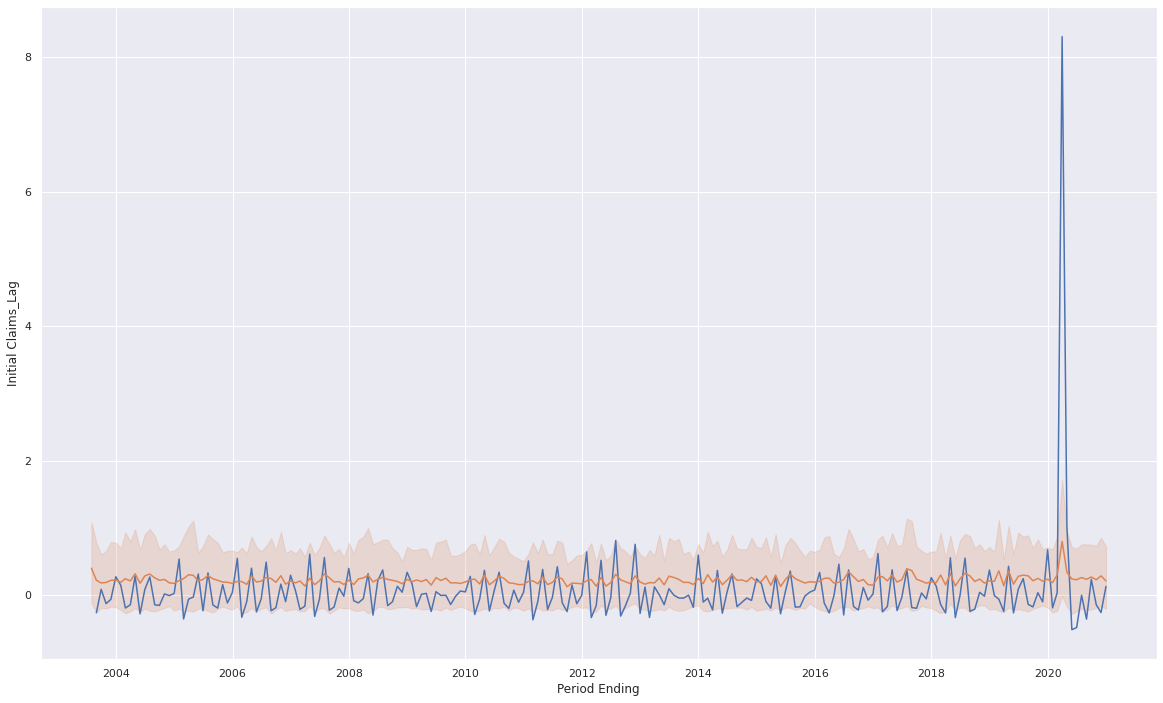

In [89]:
sns.set()
plt.figure(figsize=(20,12))
sns.lineplot(x="Period Ending", y="Initial Claims_Lag", data=df2)
sns.lineplot(x="Period Ending", y="Initial Claims_Lag", data=df3)
plt.show()